In [7]:
from math import *
import numpy as np
from qutip import *
from qutip import bloch
import matplotlib.pyplot as plt
from scipy.linalg import expm, fractional_matrix_power
import cmath

#########################################################################

# pauli matrix 
sx = np.array([[0,  1],     [1, 0]])
sy = np.array([[0, -1j],   [1j, 0]])
sz = np.array([[1, 0],     [0, -1]])
s0 = np.array([[1, 0],      [0, 1]])

# parameters(detuning factor)
v0 = 0.02           # Arbitrary settings, Actual speed : 0.04rad/μs
d0 = 0.15           # Arbitrary settings, Actual speed : 0.30rad/μs


# unitary operator
def unitary(dt, choice):
    
    # Select x,y-rotation direction.
    # [stay, +x, -x, +y, -y]
    choice_list = [0, 1, -1, 1, -1] 
    
    if choice < 3:
        # if choice = 0 ... only d0*sz
        Ham = (d0*sz+v0*choice_list[choice]*sx)
    else:
        Ham = (d0*sz+v0*choice_list[choice]*sy)

    # Creating a Unitary Operator for each of the four sections by Hamiltonian
    eigvals = np.linalg.eigh(Ham)[0]
    eigvecs = 1*np.linalg.eigh(Ham)[1]
    E = np.diag(eigvals)
    U_H = eigvecs.conj().T
    U_e = U_H.conj().T @ expm(-1j*E*dt) @ U_H
    
    return U_e


#########################################################################

# x-rotation operater
def Rx(theta):
    return np.matrix([  [cos(theta/2),    -1j*sin(theta/2)],
                        [-1j*sin(theta/2),    cos(theta/2)]])

# z-rotation operater
# Do not use Rz. Control by rotation only by Hamiltonian.
def Rz(phi): 
    return np.matrix([  [cos(phi/2)-1j*sin(phi/2),  0],
                        [0,  cos(phi/2)+1j*sin(phi/2)]])

# Calculating the Fidelity
def state_fidelity(rho_1, rho_2): 
    
    # rho_1(current state), rho_2(target state)
    # Calculate the fidelity after checking the dimensions of the two states.
    
    if np.shape(rho_1) != np.shape(rho_2):
            print("Dimensions of two states do not match.")
            return 0
    else:
        sqrt_rho_1 = fractional_matrix_power(rho_1, 1 / 2)
        fidelity = np.trace(fractional_matrix_power(sqrt_rho_1 @ rho_2 @ sqrt_rho_1, 1 / 2)) ** 2
        return np.real(fidelity)


#########################################################################

In [8]:
# 원하는 target 지점 관련하여
# 해당 변수만 변경해서 전체 실행하면
# 전체 경로 볼 수 있음
dt = 2.6
target_theta, target_phi = 0.95456725, 1.45907423
combi = [1, 3, 3, 2, 2, 4, 4, 1, 1, 3]

print(len(combi))
print(dt*len(combi))

10
26.0


In [9]:
init_wave = np.array([[1], [0]])
irho_init = np.kron(init_wave,init_wave.conj().T)

target_U = Rz(target_phi) @ Rx(target_theta)
irho_target = target_U @ irho_init @target_U.conj().T


# 중첩에서 시작할때 필요한 코드
# irho_init = Rx(pi/2) @ irho_init @Rx(pi/2).conj().T

In [10]:
# 시퀀스를 k만큼 쪼개어
# target 위치까지 가는 경로를 세밀하게 봄

k = 50
combination = []

for i in combi :
    combination += [i for j in range(k)]

print(combination)

dt = dt/k

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

[1.622366513073733e-05, -0.002079914136444701, 0.9999978368446486]
0.7890815534198412
[6.489064222470832e-05, -0.0041593131170778565, 0.9999913479143688]
0.7891940103336293
[0.00014598887738235964, -0.00623768191368238, 0.9999805348163473]
0.78931831463924
[0.0002594982840883802, -0.00831450575319849, 0.9999654002287858]
0.7894544453228105
[0.0004053907481867551, -0.010389270245223365, 0.9999459479002388]
0.7896023805753979
[0.0005836301348441163, -0.012461461509416023, 0.9999221826486838]
0.7897620385525136
[0.000794172297499664, -0.014530566302775867, 0.999894110360329]
0.78993342497804
[0.0010369650887994443, -0.016596072146763365, 0.9998617379881551]
0.7901164824721228
[0.0013119483735122728, -0.018657467454231406, 0.9998250735501929]
0.7903111776443137
[0.0016190540434241063, -0.020714241656135855, 0.9997841261275374]
0.7905174254644115
[0.0019582060342071715, -0.02276588532799395, 0.999738905862099]
0.7907352156310059
[0.002329320344259679, -0.024811890316059224, 0.99968942395409

0.8658270724248227
[0.2127922251152746, 0.04881639900902955, 0.9758772607854662]
0.8660739383004145
[0.21403410931133746, 0.052145713136659985, 0.975433352235115]
0.8662977839953234
[0.21522298126360234, 0.05549398755359948, 0.974986915646189]
0.8664985310007148
[0.21635854651073322, 0.058860392954928994, 0.9745380615926779]
0.8666761202315866
[0.21744052379446743, 0.062244095545023914, 0.9740869012473313]
0.8668305438473326
[0.21846864512927816, 0.06564425724406969, 0.9736335463541247]
0.8669617542972662
[0.21944265586874934, 0.06906003589563839, 0.9731781092005817]
0.867069693754883
[0.2203623147686468, 0.07249058547527529, 0.9727207025899627]
0.8671543645218823
[0.22122739404666997, 0.07593505630004307, 0.9722614398133265]
0.8672157418077588
[0.22203767943886937, 0.07939259523897255, 0.9718004346214687]
0.8672537816227357
[0.22279297025271572, 0.08286234592436717, 0.9713378011967488]
0.8672685057300655
[0.22349307941680766, 0.08634344896390932, 0.9708736541248093]
0.8672599031985788

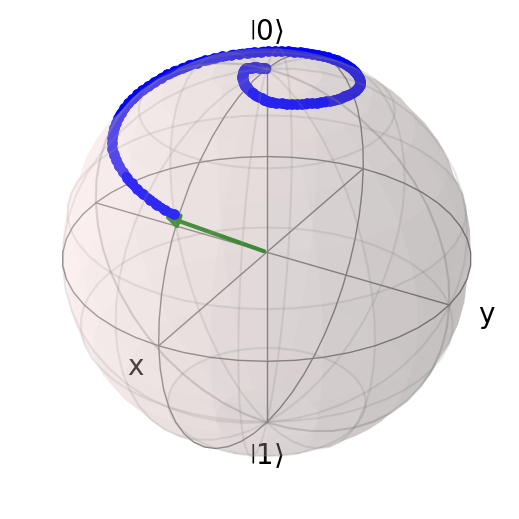

In [11]:
b = Bloch()
irho_mid = np.matrix(irho_init)
point_list = []
z = []
y = []

for i in combination:
    instant_U = unitary(dt, i)
    irho_mid = (instant_U @ irho_mid @ instant_U.conj().T)
    point = [np.trace(irho_mid * sx).real,
             np.trace(irho_mid * sy).real,
             np.trace(irho_mid * sz).real]
    b.add_points(point, 'm')
    print(point)
    z.append(np.trace(irho_mid * sz).real)
    y.append(np.trace(irho_mid * sy).real)
    point_list.append(point)
    print(state_fidelity(irho_target, irho_mid))

vector = np.array([np.trace(irho_target * sx).real,
             np.trace(irho_target * sy).real,
             np.trace(irho_target * sz).real])

print(state_fidelity(irho_target, irho_mid))

b.vector_color=['g']
b.add_vectors(vector)
# b.vector_color=['g']
#b.add_vectors([0,0,1],colors = 'r')
b.point_marker = ['o']
b.show()

In [12]:
state_fidelity(irho_mid, irho_target)

0.9989475607008642